# UCI ML Repository: Adult Income Data Set
---
### Paulo Henrique Spada de Moura
#### Aplicação de modelo de Regressão Logística para predição de renda anual de trabalhadores de diferentes áreas, baseado em parâmetros de grau de instrução, idade, nação, entre outros.

* Importação das bibliotecas básicas (pandas, numpy, etc). Os pacotes do *sklearn* para aplicação do modelo de Regressão Logística serão importados posteriormente:

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

* Importação do data set através do repositório da UCI e inserção dos nomes das colunas para identificação dos atributos

In [2]:
colunas = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship',
                'race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
file = ('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data')
adult = pd.read_csv(file,names=colunas)

In [3]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


A função abaixo foi criada para apresentar os valores únicos por atributo em nosso data set. Com ela, podemos checar se existem valores "estranhos" à coluna e avaliarmos como substituí-los, pois a 'não existência' de valores faltantes em uma base com tantos registros deve despertar alguma desconfiança:

In [5]:
def check_unicos():
        for col in colunas:
            print(adult[col].unique())
check_unicos()

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Pr

Com a aplicação da função acima, observamos que os valores categóricos do data set apresentam espaçamento à esquerda, no início. Para retirarmos esses espaços, aplicamos:

In [6]:
#Os valores categóricos do dataset estão com um espaçamento à esquerda. Retirando esses espaços:

for col in ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']:
    adult[col] = adult[col].str.lstrip()

In [7]:
check_unicos()

[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[ 77516  83311 215646 ...  34066  84661 257302]
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
['Not-in-family' 'Husband' 'Wif

Após a correção dos espaçamentos, podemos identificar também a terminologia "?" para valores não existentes (por esse motivo não era indicados valores nulos na prévia análise do data set). Nesse passo, serão efetivamente procador por valores nulos (*NaN*):

In [8]:
adult[adult == '?'] = np.nan

Conferindo novamente a existência de valores nulos:

In [9]:
adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

Podemos observar que pouco menos de 5% dos registros apresentam valores únicos. Por representar uma parcela muito pequena do data set, as linhas que apresentam esses valores serão **removidas por completo**:

In [10]:
adult = adult.dropna()
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Aplicação da Regressão Logística

No contexto da utilização do algoritmo, trataremos de uma base com parâmetros um pouco mais simples, na qual a aplicação da Regressão Logística, por mais que os dados não sejam exatamente separáveis de maneira linear, será suficiente para realizar as devidas predições e, posteriormente, até mesmo indicar se a aplicação de um modelo mais complexo (por exemplo, Random Forest) retornará uma acuracidade maior ou não. Em suma, será aplicada a Regressão Logística para âmbito de estudo e diversificação dos modelos.

* Definição dos dataframes com as **variáveis independentes** e a **variável target (*'income'*)** para construção do modelo:

In [11]:
X = adult.drop(['income'],axis=1)
y = adult['income']

In [12]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [13]:
y.head()

0    <=50K
1    <=50K
2    <=50K
3    <=50K
4    <=50K
Name: income, dtype: object

* Separação das bases de treino e teste, seguindo a recomendação da documentação do data set, que sugere o *split* **70% treino** e **30% teste**:

In [15]:
# Importação das bibliotecas sklearn para aplicação do modelo

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

* Correção do *encoding* para as variáveis categóricas:

In [16]:
from sklearn import preprocessing

categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for cat in categoricas:
    le = preprocessing.LabelEncoder()
    X_train[cat] = le.fit_transform(X_train[cat])
    X_test[cat] = le.transform(X_test[cat])

* **Dimensionamento das variáveis independentes** (*Feature Scaling* - normalização dos intervalos das variáveis independentes):

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

In [18]:
X_train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.417684,-0.204511,0.316356,0.170452,-0.434574,-1.721729,1.251744,-0.266868,0.382579,-1.438780,-0.148545,3.494073,-0.078362,0.265946
1,-0.494550,-0.204511,-1.006666,1.222721,-0.042490,-0.387728,1.748265,-0.890070,0.382579,0.695033,-0.148545,-0.219873,1.605395,0.265946
2,-0.646589,-1.261772,1.309128,0.170452,-0.434574,-1.721729,1.003483,0.979538,0.382579,-1.438780,-0.148545,-0.219873,-0.751865,0.265946
3,-1.178726,-0.204511,-0.753860,1.222721,-0.042490,-0.387728,-0.982600,-0.890070,0.382579,0.695033,-0.148545,-0.219873,1.605395,0.265946
4,1.177880,-1.261772,0.139736,1.222721,-0.042490,-0.387728,1.003483,-0.890070,0.382579,0.695033,-0.148545,-0.219873,0.931892,0.265946


- Passo 1) Utilização do modelo de regressão logística com **TODAS** as variáveis:

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Acuracidade da regressão logística (todas as variáveis): {} ' .format(accuracy_score(y_test, y_pred)))

Acuracidade da regressão logística (todas as variáveis): 0.8133495413857885 


- Passo 2) Aplicação do algoritmo de **análise de componentes principais (PCA)** para utilização das variáveis mais relevantes. Utilizando a função "*explained_variance_ratio_*", é indicada a **proporção da variância** para a inserção de cada componente principal:

In [20]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.14860046, 0.10150752, 0.08299841, 0.07943599, 0.07390192,
       0.07256705, 0.06955647, 0.06759116, 0.06418322, 0.06022321,
       0.05983379, 0.0487621 , 0.04333408, 0.02750461])

Na *array* resultante do passo acima,observados a **parcela de variância** pela qual cada variável é responsável no modelo. A seguir, faremos os testes **reduzindo a dimensionalidade**, de acordo com as variâncias de menor significância para avaliação da **acuracidade** do modelo de regressão logística:

- Passo 2.1) Eliminação da **última variável** ("*native-country*" - 2,75% de variância): 

In [21]:
X = adult.drop(['income','native-country'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for cat in categoricas:
        le = preprocessing.LabelEncoder()
        X_train[cat] = le.fit_transform(X_train[cat])
        X_test[cat] = le.transform(X_test[cat])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Acuracidade da regressão logística (13 variáveis): {} '. format(accuracy_score(y_test, y_pred)))

Acuracidade da regressão logística (13 variáveis): 0.8133495413857885 


- Passo 2.2) Eliminação das **duas últimas variáveis** ("*native-country*" e "*hours-per-week*" - ~7% de variância):

In [22]:
X = adult.drop(['income','native-country', 'hours-per-week'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for cat in categoricas:
        le = preprocessing.LabelEncoder()
        X_train[cat] = le.fit_transform(X_train[cat])
        X_test[cat] = le.transform(X_test[cat])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Acuracidade da regressão logística (12 variáveis): {} '. format(accuracy_score(y_test, y_pred)))

Acuracidade da regressão logística (12 variáveis): 0.8123549563487679 


- Passo 2.3) Eliminação das **três últimas variáveis** ("*native-country*", "*hours-per-week*" e "*capital-loss*" - ~12% de variância): 

In [23]:
X = adult.drop(['income','native-country', 'hours-per-week', 'capital-loss'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex']
for cat in categoricas:
        le = preprocessing.LabelEncoder()
        X_train[cat] = le.fit_transform(X_train[cat])
        X_test[cat] = le.transform(X_test[cat])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print('Acuracidade da regressão logística (11 variáveis): {} '. format(accuracy_score(y_test, y_pred)))

Acuracidade da regressão logística (11 variáveis): 0.811470880760305 


Considerando o problema em questão, por contarmos com uma grande quantidade de variáveis independentes (grande número de dimensões para o modelo), escolheremos uma quantidade de dimensões que possam **explicar de maneira significativa uma grande parcela da variância (pelo menos 90%)**:

In [24]:
X = adult.drop(['income'], axis=1)
y = adult['income']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


categoricas = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
for cat in categoricas:
        le = preprocessing.LabelEncoder()
        X_train[cat] = le.fit_transform(X_train[cat])
        X_test[cat] = le.transform(X_test[cat])


X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)


pca= PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
dim = np.argmax(cumsum >= 0.90) + 1
print('O número de dimensões necessárias para preservar 90% de variância é',dim)

O número de dimensões necessárias para preservar 90% de variância é 12


Dessa forma, analisando a acuracidade dos modelos de regressão logística, usaremos as **12 dimensões mais relevantes**, retornando uma acuracidade de, aproximadamente, **81,33%**.

A determinação das dimensões com PCA também pode ser auxiliada com recursos gráficos, assim como demonstrado abaixo. Aqui, na curva cumulativa da variância de acordo com a quantidade de dimensões, identificaremos o ponto aproximado de "cotovelo":

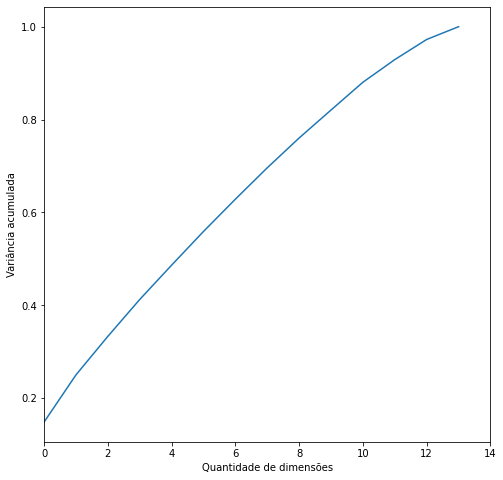

In [25]:
plt.figure(figsize=(8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,14,1)
plt.xlabel('Quantidade de dimensões')
plt.ylabel('Variância acumulada')
plt.show()

Pelo gráfico, podemos observar que a quantidade de dimensões para representação de **90% de variância** ocorre entre **11~12 dimensões**.